## Importação das Bibliotecas


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 122 kB 11.7 MB/s 


In [ ]:
import pandas as pd
import pandera as pa

In [ ]:
pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows')

## Extração das Bases de Dados

In [ ]:
#sempre ver qual a separação do arquivo csv e qual o tipo de encoding (geralmente é UTF-8)
df = pd.read_csv('https://storage.googleapis.com/aulas-bc26-dados-gbs/cenipa/ocorrencia.csv', sep=';', encoding='ISO-8859-1', parse_dates=['ocorrencia_dia'], dayfirst=True)

In [ ]:
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


## Pré-analise

In [ ]:
df.head(3) #do começo ao fim

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM


In [ ]:
df.tail(3) #do fim ao começo

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6768,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,2010-01-03,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
df.dtypes #mostra quais colunas temos e qual o tipo de dados tem em cada coluna
# é uma forma de ver as primeiras insconsistencias dos dados. 
# Ex: ocorrencia_dia e ocorrencia_hora não deveriam ser object

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                       object
ocorrencia_longitude                      object
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao                 object
total_recomendacoes                        int64
total_aeronaves_envo

In [ ]:
# saber se uma coluna é única (os valores dentro dela são todos únicos) para torná-la o rótulo das linhas
print(df.ocorrencia_classificacao.is_unique) # tem valores repetidos
print(df.codigo_ocorrencia.is_unique) # tem valores únicos

False
True


In [ ]:
# setar novo rótulo para df (rótulo != de index)
# fazer comando sem inplace = True primeiro, pois ele mostra uma previsão de como vai ficar
df.set_index('ocorrencia_classificacao', inplace=True)

In [ ]:
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
ocorrencia_classificacao,,,,,,,,,,,,,,,,,,,,,
INCIDENTE GRAVE,81027,81027,81027,81027,81027,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
INCIDENTE,81030,81030,81030,81030,81030,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
INCIDENTE GRAVE,81023,81023,81023,81023,81023,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
INCIDENTE,81029,81029,81029,81029,81029,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
INCIDENTE,81025,81025,81025,81025,81025,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCIDENTE,40324,40324,40324,40324,40324,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
ACIDENTE,39527,39527,39527,39527,39527,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
INCIDENTE,40211,40211,40211,40211,40211,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
# resetar rótulo
df.reset_index(inplace=True)

In [ ]:
df

,ocorrencia_classificacao,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE GRAVE,81027,81027,81027,81027,81027,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,INCIDENTE,81030,81030,81030,81030,81030,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,INCIDENTE GRAVE,81023,81023,81023,81023,81023,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,INCIDENTE,81029,81029,81029,81029,81029,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,INCIDENTE,81025,81025,81025,81025,81025,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,INCIDENTE,40324,40324,40324,40324,40324,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,ACIDENTE,39527,39527,39527,39527,39527,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,INCIDENTE,40211,40211,40211,40211,40211,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,INCIDENTE,40349,40349,40349,40349,40349,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


## Tratamento de Dados

In [ ]:
# backup do dataframe original
dfback = df.copy() # sem o copy(), ele apenas faz um apontamento e o que alterar em um altera no outro

In [ ]:
df.head(1)

,ocorrencia_classificacao,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE GRAVE,81027,81027,81027,81027,81027,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM


### Limpeza de dados

In [ ]:
df.isna().sum()

ocorrencia_classificacao             0
codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_latitude               1634
ocorrencia_longitude              1634
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      2
investigacao_aeronave_liberada     238
investigacao_status                341
divulgacao_relatorio_numero        782
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4988
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [ ]:
#dropagem de colunas com dados repetidos
#definir o eixo para saber se são linhas ou colunas. Eixos: x = 0 e y = 1
#inplace salva o dataframe com as modificações, fazer apenas quando tiver certeza
df.drop(['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], axis=1, inplace=True)

In [ ]:
df.head(1)

,ocorrencia_classificacao,codigo_ocorrencia,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE GRAVE,81027,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM


In [ ]:
#dropagem de colunas que não serão utilizadas
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'], axis=1, inplace=True)

In [ ]:
df

,ocorrencia_classificacao,codigo_ocorrencia,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE GRAVE,81027,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,INCIDENTE,81030,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,INCIDENTE GRAVE,81023,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,INCIDENTE,81029,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,INCIDENTE,81025,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,INCIDENTE,40324,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,ACIDENTE,39527,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,0,1,NÃO
6766,INCIDENTE,40211,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,0,1,NÃO
6767,INCIDENTE,40349,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [ ]:
# renomear as colunas
df.rename(columns={
    'codigo_ocorrencia':'ocorrencia',
    'ocorrencia_classificacao':'classificacao',
    'ocorrencia_cidade':'cidade',
    'ocorrencia_uf':'uf',
    'ocorrencia_pais':'pais',
    'ocorrencia_aerodromo':'aerodromo',
    'ocorrencia_dia':'dia',
    'ocorrencia_hora':'horario',
    'total_recomendacoes':'recomendacoes',
    'total_aeronaves_envolvidas':'n_aeronaves',
    'ocorrencia_saida_pista':'saida_pista'
    }, inplace=True)

In [ ]:
df.dtypes

classificacao            object
ocorrencia                int64
cidade                   object
uf                       object
pais                     object
aerodromo                object
dia              datetime64[ns]
horario                  object
recomendacoes             int64
n_aeronaves               int64
saida_pista              object
dtype: object

In [ ]:
#procurando dados inconsitentes
pd.unique(df['aerodromo']) #sorted classifica os elementos (NÃO FUNCIONA QUANDO TEM <NA>)
#inconsistencias encontradas: '***', '**NI'

array(['SBSP', 'SBVT', 'SDAI', 'SBBH', 'SBEG', '***', '**NI', 'SBNV',
       'SBUL', 'SBAU', 'SBBP', 'SBTE', 'SBGR', 'SBMT', 'SBCT', 'SBCF',
       'SIEK', 'SBRJ', 'SDLP', 'SWPD', 'SBMA', 'SNYP', 'SNHH', 'SBJF',
       'SBCY', 'SBPS', 'SBMK', 'SBNF', 'SBTF', 'SSMK', 'SNAX', 'SBKP',
       'SBFZ', 'SNPA', 'SBIZ', 'SNFX', 'SDRK', 'SBRF', 'SSBN', 'SBPR',
       'SBSJ', 'SBST', 'SBGO', 'SDCO', 'SBSV', 'SBPJ', 'SBGL', 'SBRD',
       'SBBE', 'SBCH', 'SBLO', 'SBPL', 'SWGW', 'SWLB', 'SBBU', 'SBMQ',
       'SIPO', 'SIAN', 'SBJV', 'SNDC', 'SBBI', 'SBSC', 'SSKG', 'SBBR',
       'SSBG', 'SBIL', 'SBPO', 'SDAM', 'SSOG', 'SBPV', 'SBSR', 'SBBV',
       'SBSN', 'SBFI', 'SDFD', 'SJEH', 'SBSI', 'SWFN', 'SDIG', 'SNHS',
       'SBJP', 'SBPA', 'SBJA', 'SBJR', 'SBRP', 'SISN', 'SBMO', 'SNRU',
       'SNQV', 'SNCP', 'SDIH', 'SBTG', 'SIVU', 'SWMV', 'SIRI', 'SNIT',
       'SBRB', 'SSPI', 'SWCA', 'SBJI', 'SBFL', 'SDRC', 'SNMH', 'SNBS',
       'SWLW', 'SSOT', 'SNPO', 'SBCG', 'SBJD', 'SDEN', 'APUA', 'SDAG',
       

### Transformação de dados

In [ ]:
#substituindo valores inconsistentes de toda a planilha por vazios
df.replace(['***', '**NI'], pd.NA, inplace=True)

In [ ]:
df.tail(5)

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista
6764,INCIDENTE,40324,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,ACIDENTE,39527,LUCAS DO RIO VERDE,MT,BRASIL,<NA>,2010-01-04,17:30:00,0,1,NÃO
6766,INCIDENTE,40211,RIO DE JANEIRO,RJ,BRASIL,<NA>,2010-01-03,12:00:00,0,1,NÃO
6767,INCIDENTE,40349,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO
6768,INCIDENTE,40351,RIO DE JANEIRO,RJ,BRASIL,SBRJ,2010-01-03,03:00:00,0,1,NÃO


In [ ]:
# converter coluna dia
df['dia'] = df['dia'].astype(str)

In [ ]:
# criar coluna de data
df['data'] = pd.to_datetime(df['dia']+ ' '+df['horario'])

In [ ]:
df.dtypes

classificacao            object
ocorrencia                int64
cidade                   object
uf                       object
pais                     object
aerodromo                object
dia                      object
horario                  object
recomendacoes             int64
n_aeronaves               int64
saida_pista              object
data             datetime64[ns]
dtype: object

In [ ]:
df2 = df[['ocorrencia', 'data', 'aerodromo', 'cidade', 'uf', 'classificacao', 'n_aeronaves', 'saida_pista', 'recomendacoes']]

In [ ]:
df2

,ocorrencia,data,aerodromo,cidade,uf,classificacao,n_aeronaves,saida_pista,recomendacoes
0,81027,2022-10-09 16:30:00,SBSP,SÃO PAULO,SP,INCIDENTE GRAVE,1,SIM,0
1,81030,2022-10-09 16:20:00,SBVT,VITÓRIA,ES,INCIDENTE,1,NÃO,0
2,81023,2022-10-06 15:30:00,SDAI,AMERICANA,SP,INCIDENTE GRAVE,1,SIM,0
3,81029,2022-10-06 00:44:00,SBBH,BELO HORIZONTE,MG,INCIDENTE,1,NÃO,0
4,81025,2022-10-05 20:56:00,SBEG,MANAUS,AM,INCIDENTE,1,NÃO,0
...,...,...,...,...,...,...,...,...,...
6764,40324,2010-01-05 19:25:00,SBPK,PELOTAS,RS,INCIDENTE,1,NÃO,0
6765,39527,2010-01-04 17:30:00,<NA>,LUCAS DO RIO VERDE,MT,ACIDENTE,1,NÃO,0
6766,40211,2010-01-03 12:00:00,<NA>,RIO DE JANEIRO,RJ,INCIDENTE,1,NÃO,0
6767,40349,2010-01-03 11:05:00,SBBE,BELÉM,PA,INCIDENTE,1,NÃO,0


## Validação de Dados

In [ ]:
df.dtypes

classificacao    object
ocorrencia        int64
cidade           object
uf               object
pais             object
aerodromo        object
dia              object
horario          object
recomendacoes     int64
n_aeronaves       int64
saida_pista      object
dtype: object

In [ ]:
# criação do schema de validação dos dados df

schema = pa.DataFrameSchema(
    columns = {
      'classificacao':pa.Column(pa.String),
      'ocorrencia':pa.Column(pa.Int),
      'cidade':pa.Column(pa.String),
      'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
      'pais':pa.Column(pa.String),
      'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
      'dia':pa.Column(pa.DateTime),
      'horario':pa.Column(pa.String,pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
      'recomendacoes':pa.Column(pa.Int),
      'n_aeronaves':pa.Column(pa.Int),
      'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3))
    }
)

# REGEX = r
# ^ = inicia
# ? = inicia e termina teste
# | = ou
# $ = termina
#^[0-1]?[0-9]|[2][0-3]: = o primeiro digito do horário vai do 0 até 1 e o segundo digito de zero até nove ou (|) o primeiro digito será 2 e o segundo digito irá até 3 (formato de hora 24:00)

In [ ]:
df2.dtypes

ocorrencia                int64
data             datetime64[ns]
aerodromo                object
cidade                   object
uf                       object
classificacao            object
n_aeronaves               int64
saida_pista              object
recomendacoes             int64
dtype: object

In [ ]:
# criação do schema de nova validação dos dados df2

schema2 = pa.DataFrameSchema(
    columns = {
      'ocorrencia':pa.Column(pa.Int),
      'data':pa.Column(pa.DateTime, nullable=True),
      'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
      'cidade':pa.Column(pa.String),
      'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
      'classificacao':pa.Column(pa.String),
      'n_aeronaves':pa.Column(pa.Int),
      'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
      'recomendacoes':pa.Column(pa.Int) 
    }
)

In [ ]:
# validador do DF
schema.validate(df)

# se aparecer o dataframe quer dizer que a tabela está validada, 
# do contrário aparece os erros a serem resolvidos

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista
0,INCIDENTE GRAVE,81027,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,INCIDENTE,81030,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,INCIDENTE GRAVE,81023,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,INCIDENTE,81029,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,INCIDENTE,81025,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,INCIDENTE,40324,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,ACIDENTE,39527,LUCAS DO RIO VERDE,MT,BRASIL,<NA>,2010-01-04,17:30:00,0,1,NÃO
6766,INCIDENTE,40211,RIO DE JANEIRO,RJ,BRASIL,<NA>,2010-01-03,12:00:00,0,1,NÃO
6767,INCIDENTE,40349,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [ ]:
# validador do DF2
schema2.validate(df2)

,ocorrencia,data,aerodromo,cidade,uf,classificacao,n_aeronaves,saida_pista,recomendacoes
0,81027,2022-10-09 16:30:00,SBSP,SÃO PAULO,SP,INCIDENTE GRAVE,1,SIM,0
1,81030,2022-10-09 16:20:00,SBVT,VITÓRIA,ES,INCIDENTE,1,NÃO,0
2,81023,2022-10-06 15:30:00,SDAI,AMERICANA,SP,INCIDENTE GRAVE,1,SIM,0
3,81029,2022-10-06 00:44:00,SBBH,BELO HORIZONTE,MG,INCIDENTE,1,NÃO,0
4,81025,2022-10-05 20:56:00,SBEG,MANAUS,AM,INCIDENTE,1,NÃO,0
...,...,...,...,...,...,...,...,...,...
6764,40324,2010-01-05 19:25:00,SBPK,PELOTAS,RS,INCIDENTE,1,NÃO,0
6765,39527,2010-01-04 17:30:00,<NA>,LUCAS DO RIO VERDE,MT,ACIDENTE,1,NÃO,0
6766,40211,2010-01-03 12:00:00,<NA>,RIO DE JANEIRO,RJ,INCIDENTE,1,NÃO,0
6767,40349,2010-01-03 11:05:00,SBBE,BELÉM,PA,INCIDENTE,1,NÃO,0


## Filtros

In [ ]:
df['aeroback'] = df.aerodromo

In [ ]:
df[['cidade','aerodromo']]

,cidade,aerodromo
0,SÃO PAULO,SBSP
1,VITÓRIA,SBVT
2,AMERICANA,SDAI
3,BELO HORIZONTE,SBBH
4,MANAUS,SBEG
...,...,...
6764,PELOTAS,SBPK
6765,LUCAS DO RIO VERDE,<NA>
6766,RIO DE JANEIRO,<NA>
6767,BELÉM,SBBE


In [ ]:
#filtra valores nulos ou ausentes | NA, NULL, Nan, NaT e etc
filtronulo = df.aerodromo.isna()
df.loc[filtronulo]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
5,ACIDENTE,81019,PORTO ALEGRE,RS,BRASIL,<NA>,2022-10-03,20:50:00,0,1,NÃO,<NA>
6,INCIDENTE,81022,LOBATO,PR,BRASIL,<NA>,2022-10-03,15:38:00,0,1,NÃO,<NA>
7,ACIDENTE,81021,NOVA BANDEIRANTES,MT,BRASIL,<NA>,2022-10-02,19:00:00,0,1,SIM,<NA>
8,INCIDENTE GRAVE,81009,NAVIRAÍ,MS,BRASIL,<NA>,2022-10-01,10:10:00,0,1,SIM,<NA>
9,INCIDENTE,81012,LINHARES,ES,BRASIL,<NA>,2022-09-30,12:20:00,0,1,NÃO,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
6758,INCIDENTE,39789,SÃO PEDRO DO SUL,RS,BRASIL,<NA>,2010-01-10,21:30:00,0,1,NÃO,<NA>
6761,INCIDENTE GRAVE,39707,CANUTAMA,AM,BRASIL,<NA>,2010-01-09,12:30:00,3,1,NÃO,<NA>
6763,INCIDENTE,39807,SALVADOR,BA,BRASIL,<NA>,2010-01-06,17:53:00,0,1,NÃO,<NA>
6765,ACIDENTE,39527,LUCAS DO RIO VERDE,MT,BRASIL,<NA>,2010-01-04,17:30:00,0,1,NÃO,<NA>


In [ ]:
#filtro de classificação 
filtroacidente = df.classificacao == 'ACIDENTE'
dfacidente = df.loc[filtroacidente]
dfacidente

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
5,ACIDENTE,81019,PORTO ALEGRE,RS,BRASIL,<NA>,2022-10-03,20:50:00,0,1,NÃO,<NA>
7,ACIDENTE,81021,NOVA BANDEIRANTES,MT,BRASIL,<NA>,2022-10-02,19:00:00,0,1,SIM,<NA>
12,ACIDENTE,81014,BOA VISTA,RR,BRASIL,<NA>,2022-09-27,00:00:00,0,1,NÃO,<NA>
15,ACIDENTE,81018,LONTRAS,SC,BRASIL,<NA>,2022-09-24,20:05:00,0,1,NÃO,<NA>
19,ACIDENTE,80998,ENGENHEIRO CALDAS,MG,BRASIL,<NA>,2022-09-21,17:51:00,0,1,NÃO,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
6750,ACIDENTE,39315,CANUTAMA,AM,BRASIL,<NA>,2010-01-15,21:22:00,0,1,NÃO,<NA>
6754,ACIDENTE,40107,GURUPÁ,PA,BRASIL,SNGU,2010-01-12,14:30:00,0,1,NÃO,SNGU
6755,ACIDENTE,39507,PRIMAVERA DO LESTE,MT,BRASIL,<NA>,2010-01-11,17:00:00,2,1,NÃO,<NA>
6759,ACIDENTE,40069,SÃO PAULO,SP,BRASIL,SBMT,2010-01-10,14:50:00,8,1,NÃO,SBMT


In [ ]:
dfreduzido = df.loc[filtroacidente,['uf','cidade','n_aeronaves']]
dfreduzido

,uf,cidade,n_aeronaves
5,RS,PORTO ALEGRE,1
7,MT,NOVA BANDEIRANTES,1
12,RR,BOA VISTA,1
15,SC,LONTRAS,1
19,MG,ENGENHEIRO CALDAS,1
...,...,...,...
6750,AM,CANUTAMA,1
6754,PA,GURUPÁ,1
6755,MT,PRIMAVERA DO LESTE,1
6759,SP,SÃO PAULO,1


In [ ]:
# filtro detalhado de cidade e saida de pista e ano
ftcidade = df.cidade == 'SÃO PAULO'
ftpista = df.saida_pista == 'SIM'
ft2020 = df.dia.dt.year == 2020
df.loc[ftcidade & ftpista & ft2020]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
1050,INCIDENTE GRAVE,79718,SÃO PAULO,SP,BRASIL,SBMT,2020-12-11,13:50:00,0,1,SIM,SBMT


In [ ]:
#criação de filtros de uf e horario
filtrouf = df.uf.isna()
filtrohorario = df.horario.isna()

In [ ]:
df.loc[filtrouf]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
283,ACIDENTE,80665,NÃO IDENTIFICADA,<NA>,BRASIL,<NA>,2022-04-22,20:00:00,0,1,NÃO,<NA>
320,INCIDENTE,80631,NÃO IDENTIFICADA,<NA>,BRASIL,<NA>,2022-04-04,11:15:00,0,1,NÃO,<NA>
912,ACIDENTE,79956,NÃO IDENTIFICADA,<NA>,BRASIL,<NA>,2021-02-26,11:00:00,0,1,NÃO,<NA>
4541,ACIDENTE,49474,ÁGUAS INTERNACIONAIS,<NA>,BRASIL,<NA>,2013-09-02,02:54:00,0,1,NÃO,<NA>


In [ ]:
df.loc[filtrohorario]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
56,INCIDENTE,80938,MARABÁ,PA,BRASIL,SBMA,2022-08-29,NaN,0,1,NÃO,SBMA
2671,INCIDENTE,78823,CORUMBÁ,MS,BRASIL,<NA>,2017-07-09,NaN,0,1,NÃO,<NA>


In [ ]:
#criando vários filtros de incidente, ano e local
ftincidente = df.classificacao == 'INCIDENTE'
ftano = df.dia.dt.year == 2021
ftsp = df.uf == 'SP'
# criando um novo df apenas com informações filtradas usando vários filtros de uma vez
dfgio = df.loc[ftsp & ftincidente & ftano]
dfgio

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
465,INCIDENTE,80456,SÃO PAULO,SP,BRASIL,SBSP,2021-12-30,13:15:00,0,1,SIM,SBSP
467,INCIDENTE,80453,CAMPINAS,SP,BRASIL,SBKP,2021-12-29,09:00:00,0,1,NÃO,SBKP
476,INCIDENTE,80545,GUARULHOS,SP,BRASIL,SBGR,2021-12-22,11:50:00,0,1,NÃO,SBGR
478,INCIDENTE,80583,GUARULHOS,SP,BRASIL,SBGR,2021-12-21,10:33:00,0,2,NÃO,SBGR
486,INCIDENTE,80431,SANTOS,SP,BRASIL,SBST,2021-12-15,12:30:00,0,1,NÃO,SBST
...,...,...,...,...,...,...,...,...,...,...,...,...
984,INCIDENTE,79827,SÃO PAULO,SP,BRASIL,SBSP,2021-01-19,16:20:00,0,1,NÃO,SBSP
994,INCIDENTE,79816,GUARULHOS,SP,BRASIL,SBGR,2021-01-11,11:50:00,0,1,NÃO,SBGR
1001,INCIDENTE,79805,GUARULHOS,SP,BRASIL,SBGR,2021-01-07,02:05:00,0,1,NÃO,SBGR
1005,INCIDENTE,79809,GUARULHOS,SP,BRASIL,SBGR,2021-01-06,12:48:00,0,1,NÃO,SBGR


In [ ]:
# filtro por região
ftsul = df.uf.isin(['RS', 'PR', 'SC'])
dfsul = df.loc[ftsul]

In [ ]:
# filtro por quinzena de um mês definido
ftagosto = df2.data.dt.month == 8
ftquinz = (df2.data.dt.day > 0) & (df2.data.dt.day< 16)
dfquinz = df2.loc[ftagosto & ftquinz]

In [ ]:
dfquinz

,ocorrencia,data,aerodromo,cidade,uf,classificacao,n_aeronaves,saida_pista,recomendacoes
82,80915,2022-08-15 09:25:00,SBGO,GOIÂNIA,GO,INCIDENTE,1,NÃO,0
83,80919,2022-08-15 11:30:00,SDCO,SOROCABA,SP,INCIDENTE,1,NÃO,0
84,80920,2022-08-15 18:30:00,<NA>,RIO DE JANEIRO,RJ,ACIDENTE,1,NÃO,0
85,81008,2022-08-15 03:15:00,SBGR,GUARULHOS,SP,INCIDENTE,1,NÃO,0
86,80921,2022-08-14 19:00:00,<NA>,SÃO LUÍS,MA,ACIDENTE,1,NÃO,0
...,...,...,...,...,...,...,...,...,...
6460,42449,2010-08-03 16:20:00,<NA>,SÃO FÉLIX DO XINGU,PA,ACIDENTE,1,NÃO,8
6461,42286,2010-08-02 10:00:00,<NA>,CUIABÁ,MT,INCIDENTE,1,NÃO,0
6462,42446,2010-08-02 11:04:00,SBAE,BAURU,SP,INCIDENTE,1,NÃO,0
6463,42626,2010-08-02 01:40:00,<NA>,CURITIBA,PR,INCIDENTE,1,NÃO,0


In [ ]:
# region filters

ftsul = df.uf.isin(['RS','PR', 'SC'])
ftsudeste = df.uf.isin(['ES','MG', 'RJ', 'SP'])
ftco = df.uf.isin(['DF','GO', 'MT', 'MS'])
ftnordeste = df.uf.isin(['AL','BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE'])
ftnorte = df.uf.isin(['AC','AP', 'AM', 'PA', 'RO', 'RR', 'TO'])

## GROUP BY

In [ ]:
#por ordem alabética do nome
df.groupby(['classificacao']).size()

classificacao
ACIDENTE           2090
INCIDENTE          3795
INCIDENTE GRAVE     884
dtype: int64

In [ ]:
dfquinz.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          11
INCIDENTE GRAVE     8
ACIDENTE            2
dtype: int64

In [ ]:
#por quantidade de valores do maior pro menor
#e mostrando valores nulos
df.groupby(['uf'], dropna=False).size().sort_values(ascending=False)

uf
SP     1625
MG      638
RJ      578
PR      548
RS      395
GO      359
MT      359
PA      344
AM      279
BA      253
SC      223
MS      191
DF      156
PE      126
CE       95
ES       91
MA       86
RR       73
AC       66
TO       60
RO       54
PI       45
AL       34
PB       28
SE       22
RN       22
AP       15
NaN       4
dtype: int64

In [ ]:
df.groupby(['aerodromo'], dropna=False).size().sort_values(ascending=False)

aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
        ... 
SJVL       1
SJTO       1
SJOD       1
SJNQ       1
SJNC       1
Length: 574, dtype: int64

## Plotagem 

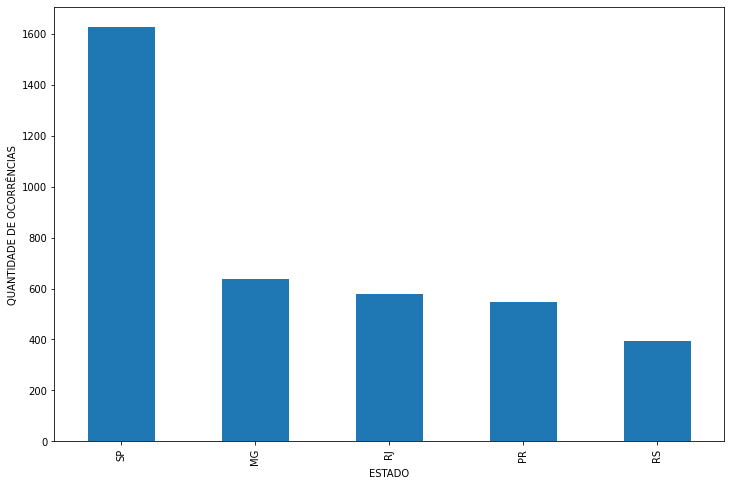

In [ ]:
# plotagem de gráfico de barra
df.groupby(['uf'], dropna=False).size().sort_values(ascending=False).head(5).plot.bar(figsize=(12,8), xlabel='ESTADO', ylabel='QUANTIDADE DE OCORRÊNCIAS')

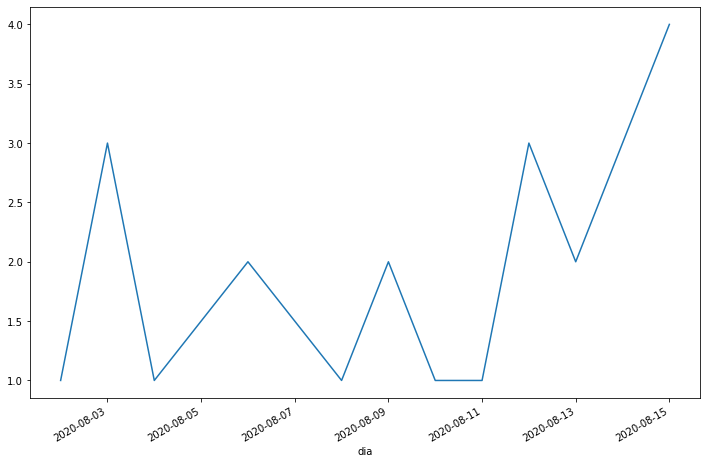

In [ ]:
# usar linha em variações temporais
dfquinz.groupby(['dia'], dropna=False).size().sort_values(ascending=False).plot.line(figsize=(12,8))

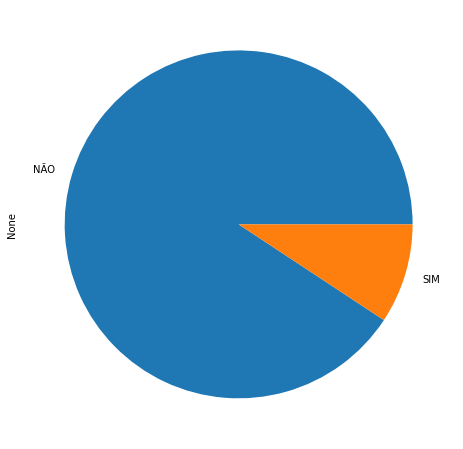

In [ ]:
# usar pizza quando tem no máximo 3 itens (categorias)
df.groupby(['saida_pista'], dropna=False).size().sort_values(ascending=False).plot.pie(figsize=(8,8))

## Load | Carregamento

In [ ]:
schema2.validate(df2)

In [ ]:
# utilizar quando uma coluna do df for rótulo
#df2.to_csv('cenipa_geral.csv')

In [ ]:
# utilizar quando o rótulo for o padrão do pandas
df2.to_csv('cenipa_geral_correto.csv',index=False)

In [ ]:
df2.to_excel('cenipa_excel_ok.xlsx',index=False)

In [ ]:
dfexcel = pd.read_excel('/content/cenipa_excel_ok.xlsx')
dfexcel

,ocorrencia,data,aerodromo,cidade,uf,classificacao,n_aeronaves,saida_pista,recomendacoes
0,81027,2022-10-09 16:30:00,SBSP,SÃO PAULO,SP,INCIDENTE GRAVE,1,SIM,0
1,81030,2022-10-09 16:20:00,SBVT,VITÓRIA,ES,INCIDENTE,1,NÃO,0
2,81023,2022-10-06 15:30:00,SDAI,AMERICANA,SP,INCIDENTE GRAVE,1,SIM,0
3,81029,2022-10-06 00:44:00,SBBH,BELO HORIZONTE,MG,INCIDENTE,1,NÃO,0
4,81025,2022-10-05 20:56:00,SBEG,MANAUS,AM,INCIDENTE,1,NÃO,0
...,...,...,...,...,...,...,...,...,...
6764,40324,2010-01-05 19:25:00,SBPK,PELOTAS,RS,INCIDENTE,1,NÃO,0
6765,39527,2010-01-04 17:30:00,NaN,LUCAS DO RIO VERDE,MT,ACIDENTE,1,NÃO,0
6766,40211,2010-01-03 12:00:00,NaN,RIO DE JANEIRO,RJ,INCIDENTE,1,NÃO,0
6767,40349,2010-01-03 11:05:00,SBBE,BELÉM,PA,INCIDENTE,1,NÃO,0


## Mais Comandos

In [ ]:
df.head(2)

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
0,INCIDENTE GRAVE,81027,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM,SBSP
1,INCIDENTE,81030,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO,SBVT


In [ ]:
#consultas de dados
df.loc[2000]

classificacao              INCIDENTE
ocorrencia                     78435
cidade                   JOÃO PESSOA
uf                                PB
pais                          BRASIL
aerodromo                       SBJP
dia              2019-01-12 00:00:00
horario                     22:35:00
recomendacoes                      0
n_aeronaves                        1
saida_pista                      NÃO
aeroback                        SBJP
Name: 2000, dtype: object

In [ ]:
df.loc[[80,90,100]]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
80,INCIDENTE,80962,CAMPINAS,SP,BRASIL,SBKP,2022-08-17,10:52:00,0,1,NÃO,SBKP
90,INCIDENTE GRAVE,80914,FRANCA,SP,BRASIL,<NA>,2022-08-12,10:45:00,0,1,NÃO,<NA>
100,INCIDENTE,80913,GUARULHOS,SP,BRASIL,SBGR,2022-08-06,14:00:00,0,1,NÃO,SBGR


In [ ]:
df.loc[80:85]

,classificacao,ocorrencia,cidade,uf,pais,aerodromo,dia,horario,recomendacoes,n_aeronaves,saida_pista,aeroback
80,INCIDENTE,80962,CAMPINAS,SP,BRASIL,SBKP,2022-08-17,10:52:00,0,1,NÃO,SBKP
81,INCIDENTE GRAVE,80922,GUARUJÁ,SP,BRASIL,SBST,2022-08-16,13:00:00,0,1,NÃO,SBST
82,INCIDENTE,80915,GOIÂNIA,GO,BRASIL,SBGO,2022-08-15,09:25:00,0,1,NÃO,SBGO
83,INCIDENTE,80919,SOROCABA,SP,BRASIL,SDCO,2022-08-15,11:30:00,0,1,NÃO,SDCO
84,ACIDENTE,80920,RIO DE JANEIRO,RJ,BRASIL,<NA>,2022-08-15,18:30:00,0,1,NÃO,<NA>
85,INCIDENTE,81008,GUARULHOS,SP,BRASIL,SBGR,2022-08-15,03:15:00,0,1,NÃO,SBGR


In [ ]:
df.loc[0,'cidade']

'SÃO PAULO'

In [ ]:
df.loc[:,'cidade']

0                SÃO PAULO
1                  VITÓRIA
2                AMERICANA
3           BELO HORIZONTE
4                   MANAUS
               ...        
6764               PELOTAS
6765    LUCAS DO RIO VERDE
6766        RIO DE JANEIRO
6767                 BELÉM
6768        RIO DE JANEIRO
Name: cidade, Length: 6769, dtype: object

In [ ]:
#inserção de dados
#USAR COM CAUTELA
df.loc[0,'cidade'] = 'BISMARK'

In [ ]:
df.loc[0,'cidade']

'BISMARK'

In [ ]:
df.loc[0,'cidade'] = 'SÃO PAULO'

In [ ]:
df.loc[0,'cidade']

'SÃO PAULO'

In [ ]:
#faz backup de uma coluna
df['back_cidade'] = df.cidade

In [ ]:
df.loc[:,'back_cidade'] = 'ANDRÉ'

In [ ]:
df['back_cidade']

0       ANDRÉ
1       ANDRÉ
2       ANDRÉ
3       ANDRÉ
4       ANDRÉ
        ...  
6764    ANDRÉ
6765    ANDRÉ
6766    ANDRÉ
6767    ANDRÉ
6768    ANDRÉ
Name: back_cidade, Length: 6769, dtype: object

In [ ]:
df.drop(['back_cidade'], axis=1, inplace=True)

In [ ]:
#consulta valores ausentes
df.isna().sum()

classificacao       0
ocorrencia          0
cidade              0
uf                  4
pais                0
aerodromo        2618
dia                 0
horario             2
recomendacoes       0
n_aeronaves         0
saida_pista         0
aeroback         2618
dtype: int64

In [ ]:
#contagem de valores "válidos"
df.count()

classificacao    6769
ocorrencia       6769
cidade           6769
uf               6765
pais             6769
aerodromo        4151
dia              6769
horario          6767
recomendacoes    6769
n_aeronaves      6769
saida_pista      6769
aeroback         4151
dtype: int64

In [ ]:
#mostra as informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   classificacao  6769 non-null   object        
 1   ocorrencia     6769 non-null   int64         
 2   cidade         6769 non-null   object        
 3   uf             6765 non-null   object        
 4   pais           6769 non-null   object        
 5   aerodromo      4151 non-null   object        
 6   dia            6769 non-null   datetime64[ns]
 7   horario        6767 non-null   object        
 8   recomendacoes  6769 non-null   int64         
 9   n_aeronaves    6769 non-null   int64         
 10  saida_pista    6769 non-null   object        
 11  aeroback       4151 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 634.7+ KB


In [ ]:
#mostra tamanho do df
df.shape

(6769, 12)